In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/gdrive/MyDrive/Birds classification /New folder.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_ds="/content/train"
test_ds="/content/test"
validation_ds="/content/valid"

In [ ]:
os.listdir('/content/train')

['ALBATROSS',
 'AFRICAN PIED HORNBILL',
 'AMERICAN KESTREL',
 'ALEXANDRINE PARAKEET',
 'AMERICAN GOLDFINCH',
 'AFRICAN PYGMY GOOSE',
 'ABBOTTS BABBLER',
 'ABYSSINIAN GROUND HORNBILL',
 'AMERICAN COOT',
 'ALBERTS TOWHEE',
 'AFRICAN EMERALD CUCKOO',
 'ABBOTTS BOOBY',
 'AFRICAN FIREFINCH',
 'ALPINE CHOUGH',
 'AMERICAN FLAMINGO',
 'AMERICAN AVOCET',
 'AFRICAN CROWNED CRANE',
 'AMERICAN BITTERN',
 'ALTAMIRA YELLOWTHROAT',
 'AFRICAN OYSTER CATCHER']

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)#initialize train generator



valid_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize validation generator

test_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize test generator

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)

test_datagen = ImageDataGenerator()
valid_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(train_ds,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')
validation_generator = valid_datagen.flow_from_directory(validation_ds,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')

Found 3208 images belonging to 20 classes.
Found 100 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


In [ ]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [ ]:
img= train_generator[0]
print(img)

(array([[[[103.26224  , 131.52448  ,  83.52448  ],
         [104.2038   , 133.2038   ,  85.2038   ],
         [104.7093   , 134.14536  ,  86.       ],
         ...,
         [ 70.       ,  95.       ,  56.       ],
         [ 70.       ,  95.       ,  56.       ],
         [ 70.       ,  95.       ,  56.       ]],

        [[103.26127  , 131.52254  ,  83.52253  ],
         [104.20282  , 133.20282  ,  85.20282  ],
         [104.71124  , 134.14438  ,  86.       ],
         ...,
         [ 70.       ,  95.       ,  56.       ],
         [ 70.       ,  95.       ,  56.       ],
         [ 70.       ,  95.       ,  56.       ]],

        [[103.26029  , 131.52058  ,  83.520584 ],
         [104.20185  , 133.20184  ,  85.20185  ],
         [104.713196 , 134.1434   ,  86.       ],
         ...,
         [ 70.       ,  95.       ,  56.       ],
         [ 70.       ,  95.       ,  56.       ],
         [ 70.       ,  95.       ,  56.       ]],

        ...,

        [[123.68183  , 125.16902  , 1

In [ ]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [ ]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 20)


In [ ]:
print(len(train_generator))
print(len(test_ds))
print(len(validation_ds))

101
13
14


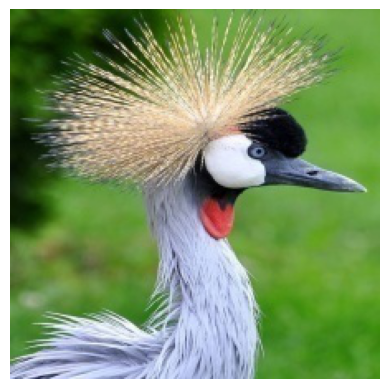

In [ ]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/content/images to predict/4.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

from google.colab.patches import cv2_imshow

In [ ]:
# VGG 19 Model
class VGG19(Sequential):
    def __init__(self, input_shape):
        super().__init__()

        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu', input_shape= input_shape))
        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Flatten())
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        self.add(Dense(20, activation= 'softmax'))

        self.compile(optimizer= tf.keras.optimizers.Adam(0.003),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
model = VGG19((224, 224, 3))

In [ ]:
model.summary()

Model: "vgg19_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_49 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_51 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                      

In [ ]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history =model.fit(train_generator, validation_data=validation_generator, epochs=45)

Epoch 1/45
101/101 [==============================] - 62s 597ms/step - loss: 3.0000 - accuracy: 0.0542 - val_loss: 2.9817 - val_accuracy: 0.0400
Epoch 2/45
101/101 [==============================] - 59s 584ms/step - loss: 2.9014 - accuracy: 0.0845 - val_loss: 2.7086 - val_accuracy: 0.1000
Epoch 3/45
101/101 [==============================] - 60s 588ms/step - loss: 2.7638 - accuracy: 0.1337 - val_loss: 2.5392 - val_accuracy: 0.2100
Epoch 4/45
101/101 [==============================] - 61s 598ms/step - loss: 2.6320 - accuracy: 0.1786 - val_loss: 2.4026 - val_accuracy: 0.2100
Epoch 5/45
101/101 [==============================] - 61s 600ms/step - loss: 2.4667 - accuracy: 0.2204 - val_loss: 1.9724 - val_accuracy: 0.4000
Epoch 6/45
101/101 [==============================] - 60s 585ms/step - loss: 2.2401 - accuracy: 0.2862 - val_loss: 1.8345 - val_accuracy: 0.4800
Epoch 7/45
101/101 [==============================] - 59s 584ms/step - loss: 2.0912 - accuracy: 0.3204 - val_loss: 1.6871 - val_ac

In [ ]:
n_categories = len(os.listdir('/content/train'))# number of categories print(n_categories)

In [ ]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,2.999951,0.054239,2.981727,0.04
1,2.901375,0.084476,2.708554,0.10
2,2.763825,0.133728,2.539226,0.21
3,2.631986,0.178616,2.402570,0.21
4,2.466742,0.220387,1.972366,0.40


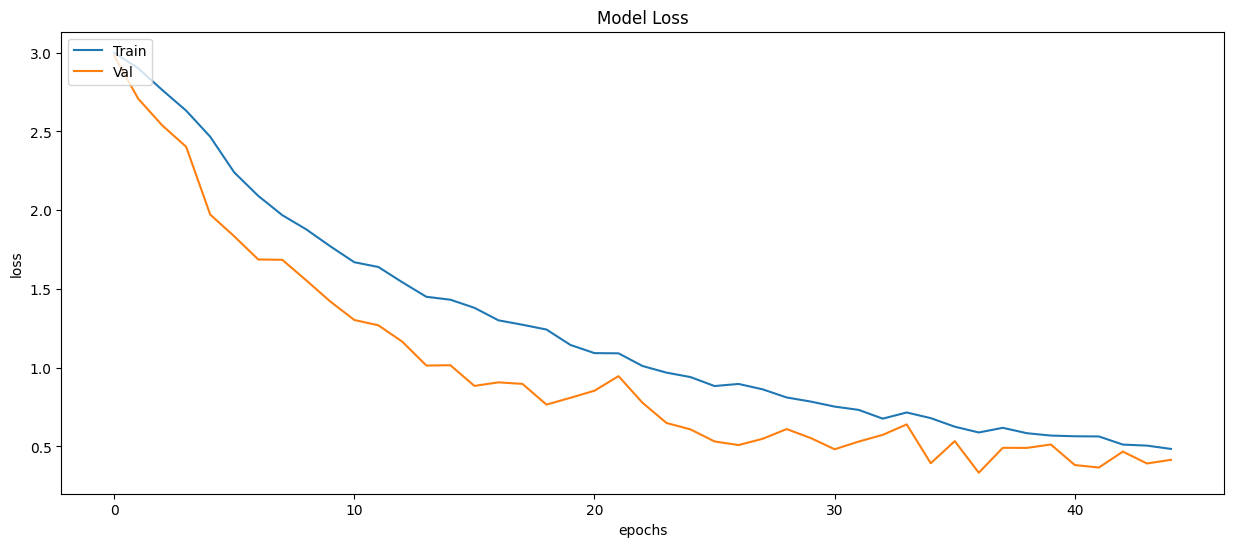

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

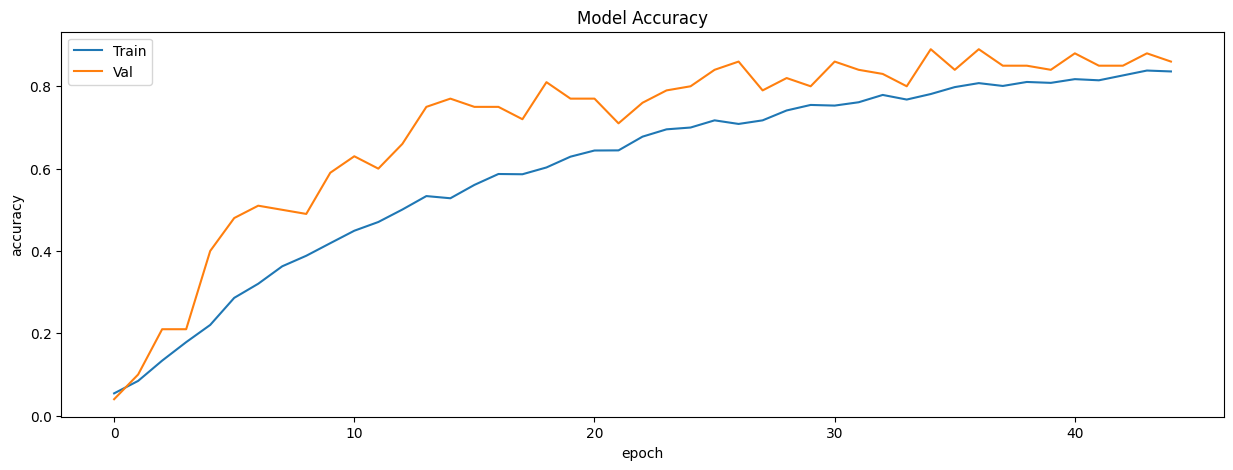

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

4/4 [==============================] - 1s 152ms/step


In [ ]:
results =model.evaluate(test_generator)

4/4 [==============================] - 1s 123ms/step - loss: 0.3032 - accuracy: 0.9000
